# *Global Sales Prediction of Video Games*

_Global Sales Prediction of Video Games using LinearRegression_

**Features of Dataset :**
- **Rank**         - Ranking of overall sales
- **Name**         - Game Name
- **Platform**     - Platform of the games release
- **year**         - ear of the game's release
- **Genre**        - Genre of the game i.e, Characterstics
- **Publisher**    - Publisher of the game
- **NA_Sales**     - Sales in North America (in millions)
- **EU_Sales**     - Sales in Europe (in millions)
- **JP_Sales**     - Sales in Japan (in millions)
- **Other_Sales**  - Sales in the rest of the world (in millions)
- **Global_Sales** - Total worldwide sales.


**Importing libraries**

In [44]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
dataset = pd.read_csv(r'vgsales.csv')

In [46]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [47]:
dataset.shape

(16598, 11)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [49]:
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [50]:
dataset.describe(include ='O')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [51]:
dataset.duplicated().sum()

0

In [52]:
dataset.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [53]:
dataset['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [54]:
dataset['Year'].mode()

0    2009.0
Name: Year, dtype: float64

In [55]:
dataset['Year'] = dataset["Year"].fillna(2009)

In [56]:
dataset.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [57]:
dataset.dropna(inplace=True)

In [58]:
dataset.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [59]:
x = dataset.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
x = x.reset_index()
x = x[:5]
x

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


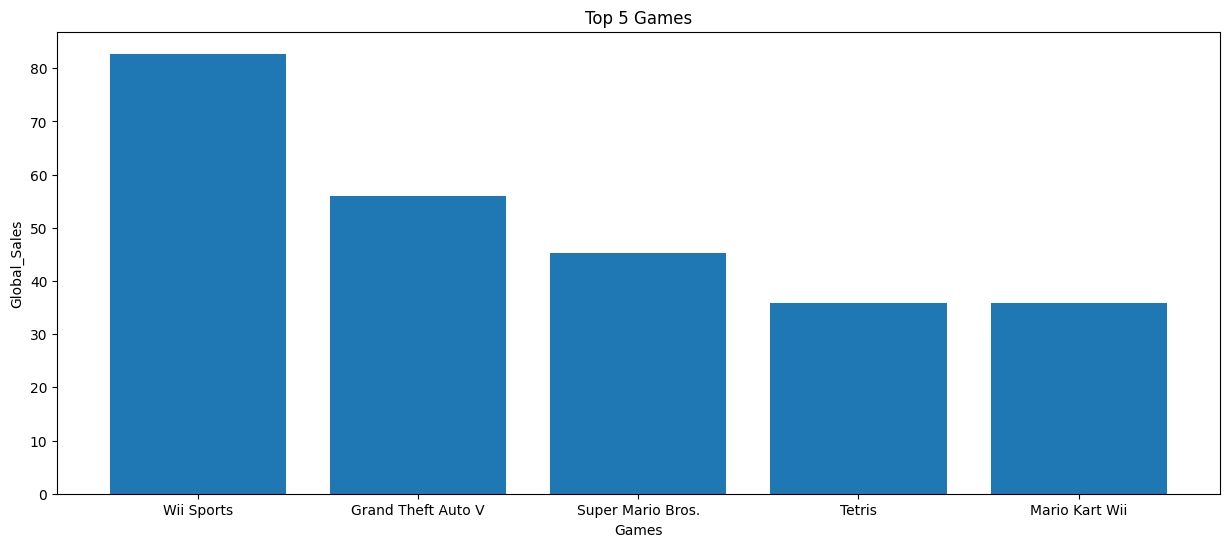

In [60]:
plt.figure(figsize=(15,6))
plt.bar(x['Name'],x['Global_Sales'])
plt.xlabel('Games')
plt.ylabel('Global_Sales')
plt.title('Top 5 Games');

<Axes: >

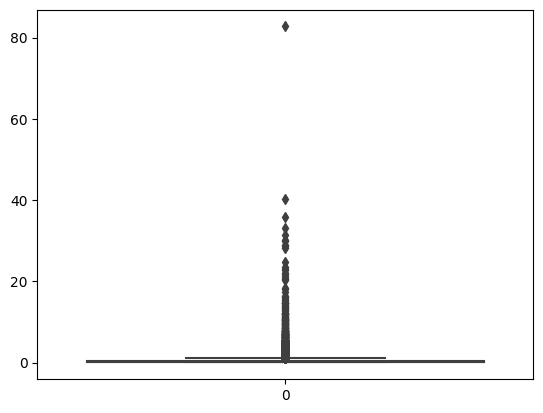

In [61]:
sb.boxplot(dataset.Global_Sales)

In [62]:
dataset[dataset.Global_Sales>40]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [63]:
row = dataset.iloc[0]
row['Name'].lower().split(" ")

['wii', 'sports']

In [64]:
dataset['Name_category']=''

In [65]:
def adjust(row):
    a = row['Name'].lower().split(' ')
    if (a[0]=='just') or (a[0]=='street') or (a[0]=='brian') or (a[0]=='gran') or (a[0]=="assassin's")or (a[0]=="the") :
            row['Name_category'] = str.join(' ',[row['Name_category'],a[0],a[1]])
    elif (a[0]=='call') or (a[0]=='metal') or (a[0]=='need') or (a[0]=='lego') or (a[0]=="god") :
            row['Name_category'] = str.join(' ',[row['Name_category'],a[0],a[1]])
    else :
            row['Name_category'] = str.join(' ',[row['Name_category'],a[0]])
   
    return row['Name_category']

In [66]:
for i in range (dataset.shape[0]):
    dataset.iloc[i,-1]=adjust(dataset.iloc[i])  

In [67]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_category
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,wii
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,super
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,mario
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,wii
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,pokemon


In [68]:
dataset = dataset.drop(['Name'],axis=1)

In [69]:
lst = ['Name_category','Platform','Genre','Publisher']
for i in lst :
    LE = LabelEncoder()
    dataset[i] = LE.fit_transform(dataset[i])

In [70]:
dataset.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_category
0,1,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74,3911
1,2,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24,3310
2,3,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82,2085
3,4,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00,3911
4,5,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37,2626


In [71]:
North_America = dataset['NA_Sales'].sum()
Europe = dataset['EU_Sales'].sum()
Japan = dataset['JP_Sales'].sum()
others = dataset['Other_Sales'].sum()
print("NA_Sales: ",North_America,"\nEurope: ",Europe,"\nJP_Sales",Japan,"\nOther_Sales",others)

NA_Sales:  4384.41 
Europe:  2429.4500000000003 
JP_Sales 1290.09 
Other_Sales 797.0800000000002


<Axes: >

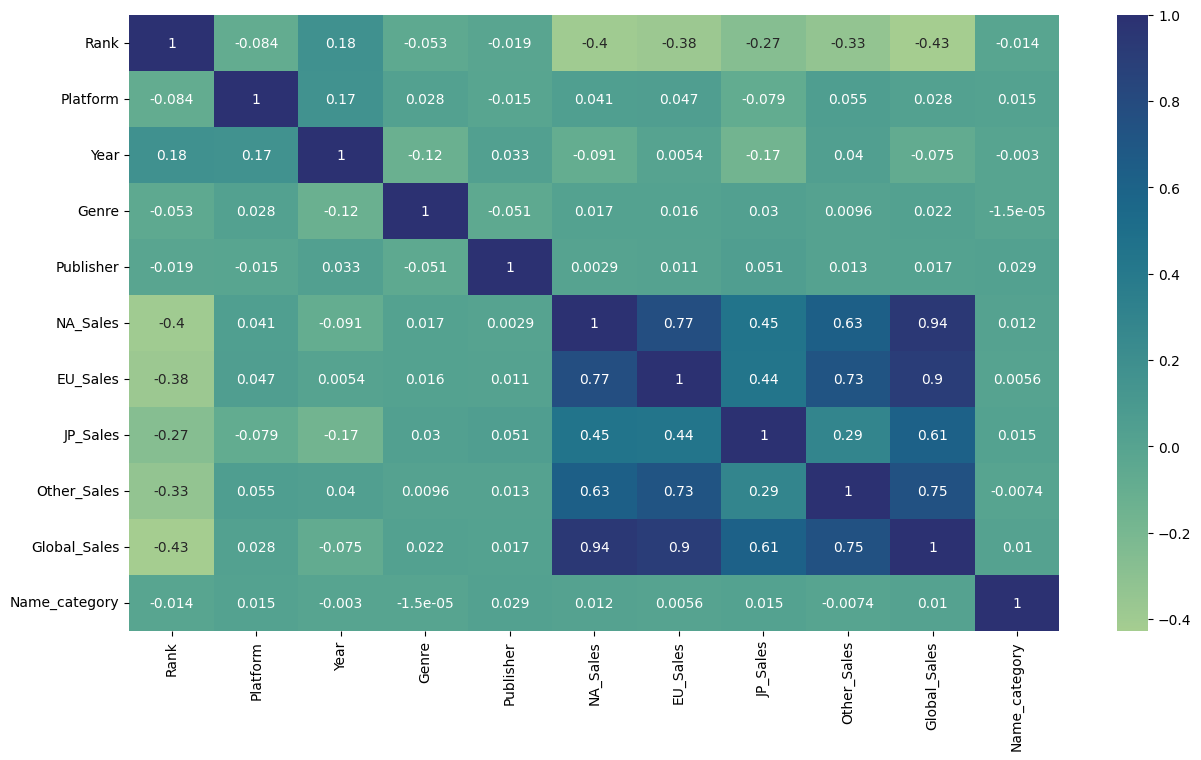

In [72]:
plt.figure(figsize= (15,8))

sb.heatmap(dataset.corr(),annot = True , cmap="crest")

In [73]:
Y = dataset['Global_Sales']
X = dataset.drop(['Global_Sales','Rank','EU_Sales','JP_Sales','Other_Sales'],axis=1)

In [74]:
X.head()

,Platform,Year,Genre,Publisher,NA_Sales,Name_category
0,26,2006.0,10,359,41.49,3911
1,11,1985.0,4,359,29.08,3310
2,26,2008.0,6,359,15.85,2085
3,26,2009.0,10,359,15.75,3911
4,5,1996.0,7,359,11.27,2626


In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12405, 6)
(4135, 6)
(12405,)
(4135,)


In [77]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [78]:
Y_pred = lr.predict(X_test)

In [79]:
Y_pred

array([0.2941243 , 1.11807573, 0.20533263, ..., 0.45624342, 0.97702717,
       0.65759425])

In [80]:
r2_score(Y_test,Y_pred)

0.9181331123139221

In [81]:
result = pd.DataFrame(columns=['Original','Predicted'])
result['Original'] = Y_test
result['Predicted'] = Y_pred
result = result.reset_index()
result['ID'] = result.index
result

,index,Original,Predicted,ID
0,3945,0.51,0.294124,0
1,1035,1.72,1.118076,1
2,12102,0.07,0.205333,2
3,9272,0.14,0.291480,3
4,7822,0.19,0.304800,4
...,...,...,...,...
4130,10253,0.11,0.203587,4130
4131,2623,0.79,0.448883,4131
4132,6382,0.27,0.456243,4132
4133,1842,1.11,0.977027,4133


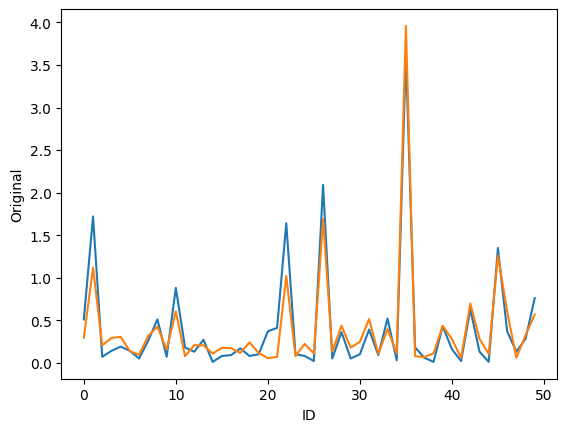

In [82]:
sb.lineplot(x="ID",y='Original',data=result.head(50))
sb.lineplot(x="ID",y='Predicted',data=result.head(50))
plt.show()

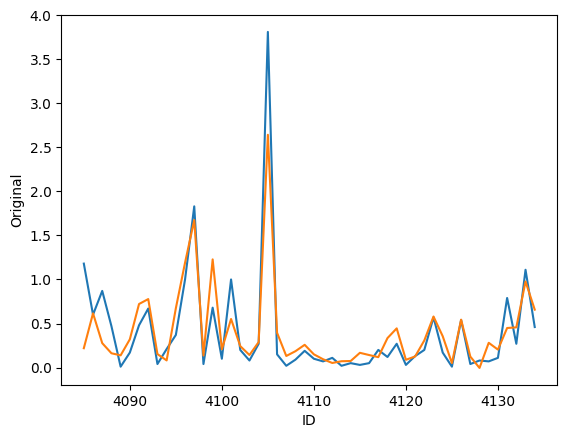

In [83]:
sb.lineplot(x="ID",y='Original',data=result.tail(50))
sb.lineplot(x="ID",y='Predicted',data=result.tail(50))
plt.show()